# MAC0219 - Programação Concorrente e Paralela

## EP1: Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP

Gabriel Brandão de Almeida, NUSP. 10737182.

In [40]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

sns.set_theme()

In [41]:
files = {
    'seq': 'results/mandelbrot_seq.csv',
    'pth': 'results/mandelbrot_pth.csv',
    'omp': 'results/mandelbrot_omp.csv'
}

In [42]:
def read_stats(path):
    return pd.read_csv(path)

In [43]:
stats = dict()

for prog, path in files.items():
    stats[prog] = read_stats(path)

In [44]:
def plot_stats(df, x, y, title, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    sp1 = sns.lineplot(data=df, x=x, y=y, hue='region', ax=ax1, palette='deep')
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )

    plt.savefig(f"{title}.png".replace('/',''), format='png', dpi=150)

## Experimentos

Para cada uma das versões, foram realizadas medições de tempo de 10 execuções dos programas. Os gráficos apresentados a seguir, mostram a média das medições e seus intervalos de confiança (0.95%).

## Resultados - Sequencial

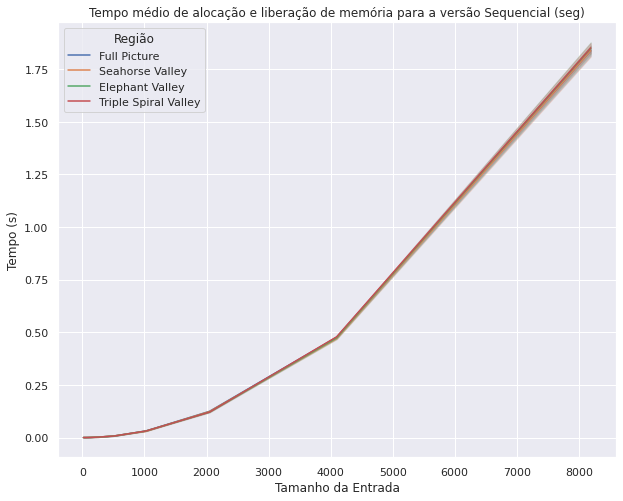

In [45]:
plot_stats(stats['seq'], 'size', 'memory_time', 'Tempo médio de alocação e liberação de memória para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

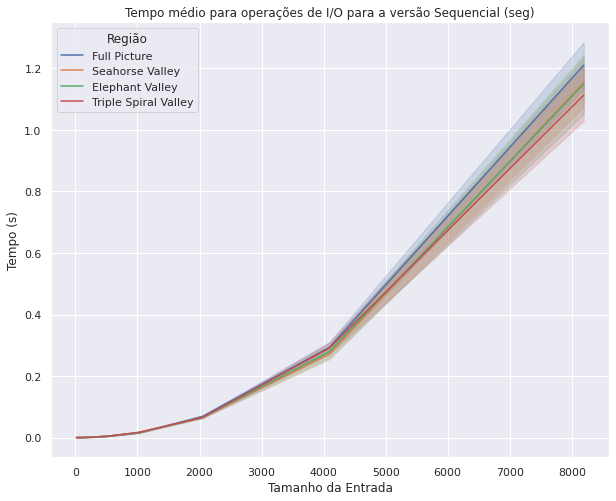

In [46]:
plot_stats(stats['seq'], 'size', 'io_time', 'Tempo médio para operações de I/O para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

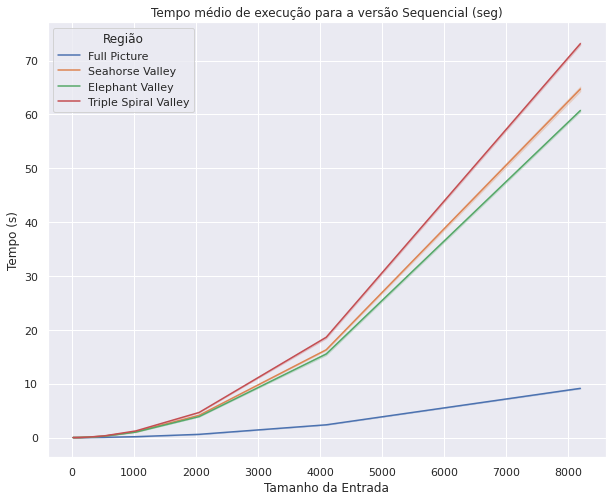

In [47]:
plot_stats(stats['seq'], 'size', 'computation_time', 'Tempo médio de execução para a versão Sequencial (seg)', 'Tamanho da Entrada', 'Tempo (s)')

Note que quanto maior o tamanho da entrada, menor o impacto das operações de I/O e alocação de memória no tempo de execução. Para tamanhos de entrada pequenos (< 512), o tempo decorrido em cada etapa (I/O, alocação e liberação de memória, e cálculos) é muito similar, contudo, quando o tamanho de entrada aumenta, o tempo médio gasto nas operações que não incluem o cálculo do conjunto de Mandelbrot, somam, no máximo, 3 segundos, enquanto o tempo médio de execução corresponde é de, no máximo, 75 segundos.

Além disso, observa-se que as regiões impactam fortemente o tempo de execução do programa. Isso ocorre pois regiões mais complexas, isto é, com mais áreas contendo pontos em que a convergência demanda mais iterações. Sendo assim, pode-se concluir que a figura completa é mais simples e as demais figuras são similarmente complexas.

## Resultados - PThreads

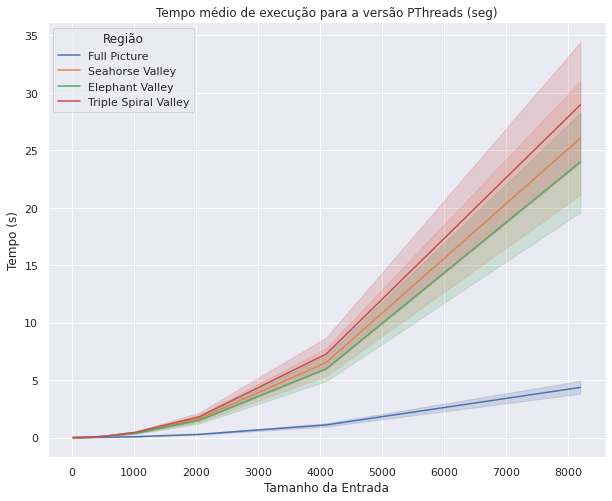

In [55]:
plot_stats(stats['pth'], 'size', 'computation_time', 'Tempo médio de execução para a versão PThreads (seg)', 'Tamanho da Entrada', 'Tempo (s)')

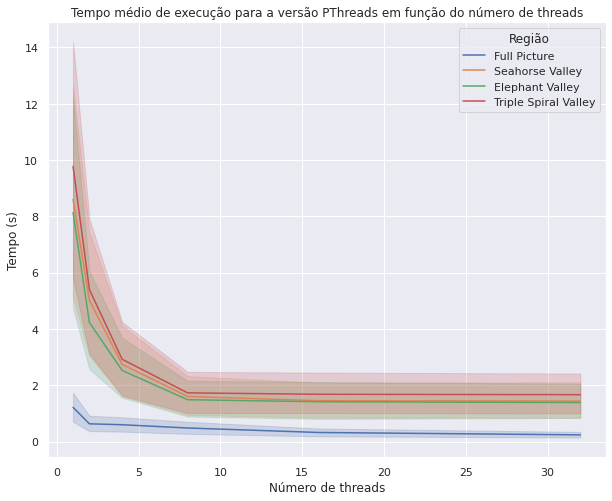

In [50]:
plot_stats(stats['pth'], 'threads', 'computation_time', 'Tempo médio de execução para a versão PThreads em função do número de threads', 'Número de threads', 'Tempo (s)')

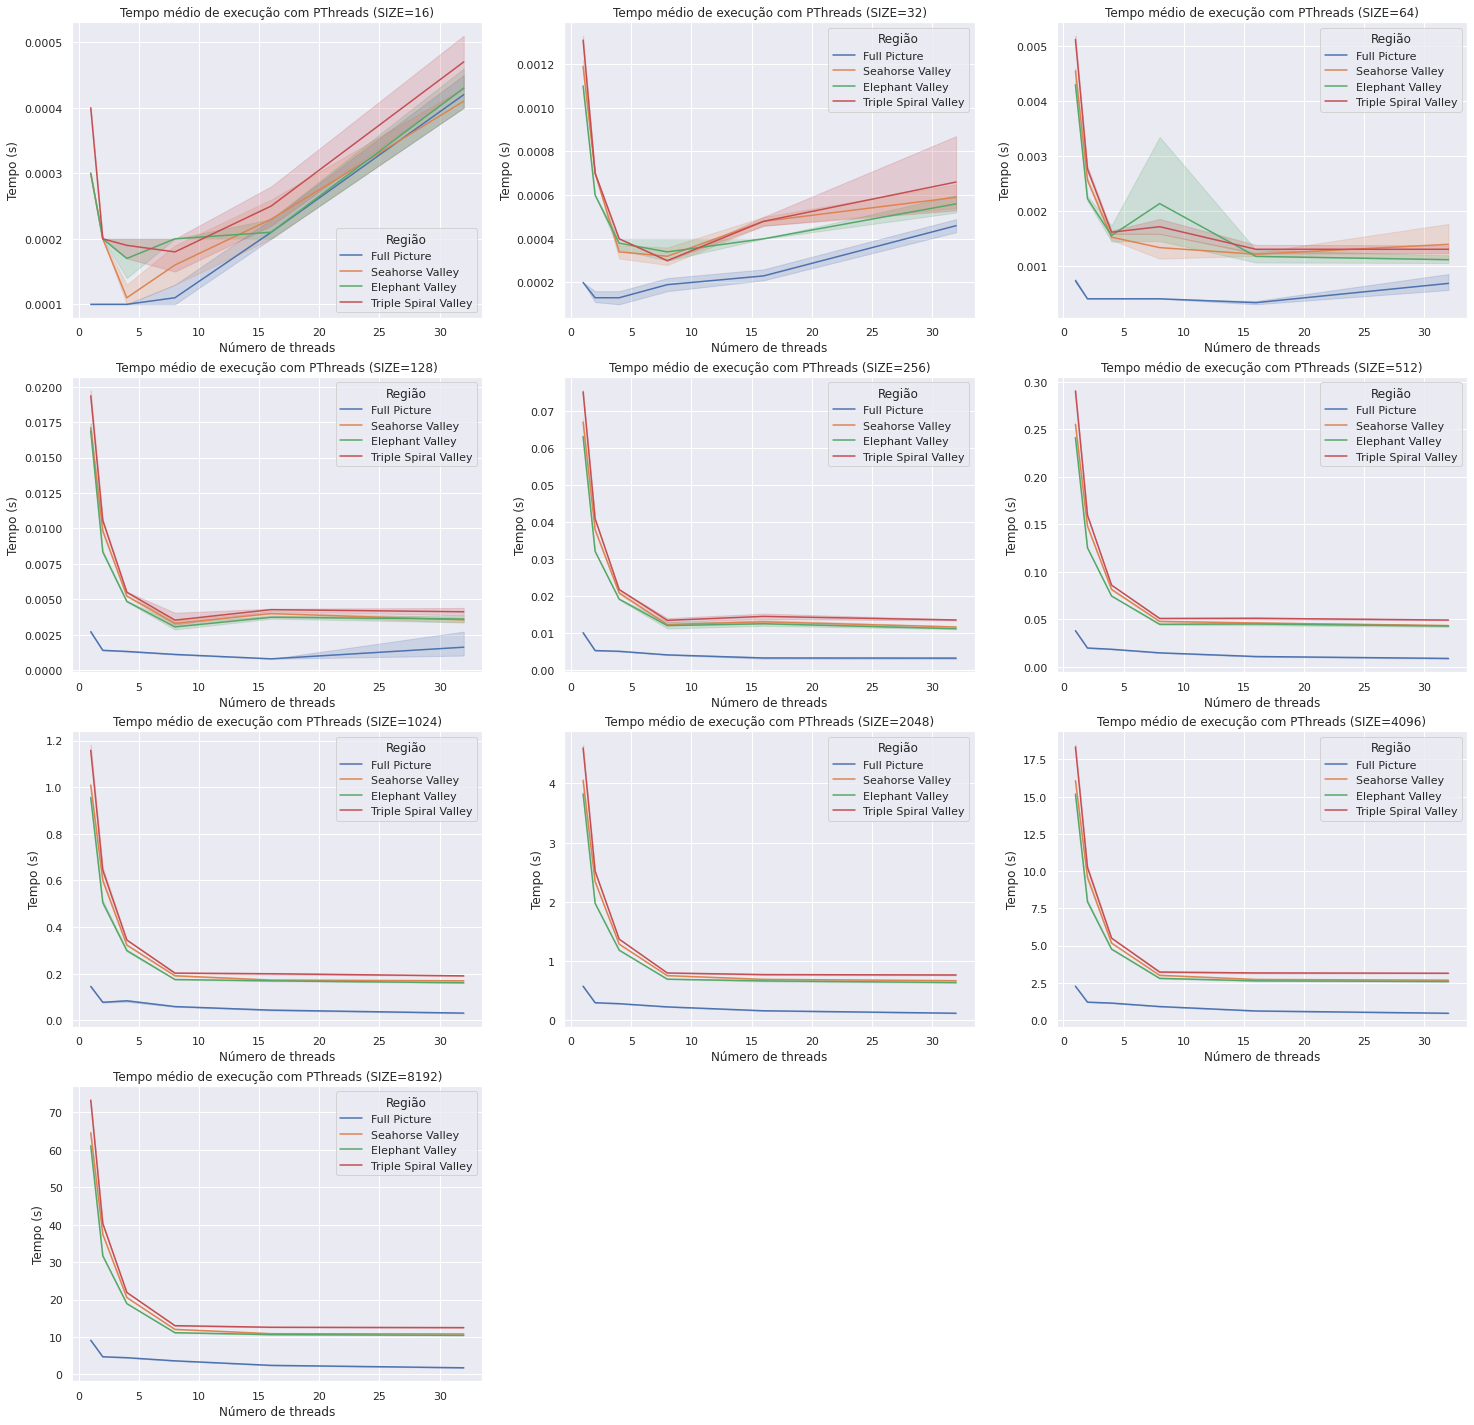

In [51]:
fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs[3, 1].axis('off')
axs[3, 2].axis('off')

for size in range(4, 14):
    df = stats['pth'][stats['pth']['size'] == 2**size]
    
    i, j = (size-4)//3, (size-4)%3
    
    sp1 = sns.lineplot(data=df, x='threads', y='computation_time', hue='region', ax=axs[i, j], palette='deep')
    axs[i,j].set_title(f'Tempo médio de execução com PThreads (SIZE={2**size})')
    axs[i,j].set_xlabel('Número de threads')
    axs[i,j].set_ylabel('Tempo (s)')
    legend = axs[i,j].get_legend()
    handles = legend.legendHandles
    legend.remove()
    axs[i,j].legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )

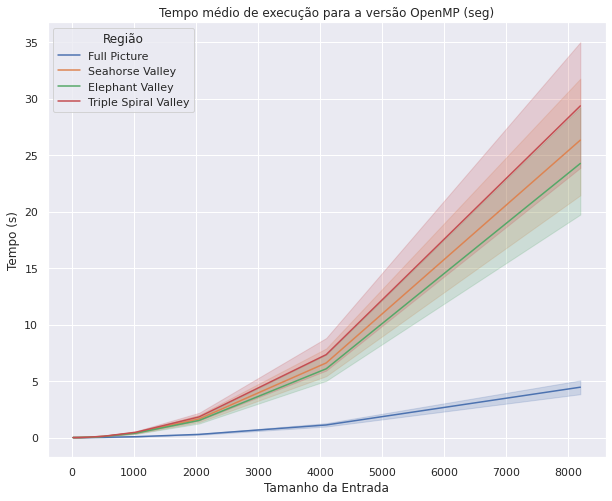

In [54]:
plot_stats(stats['omp'], 'size', 'computation_time', 'Tempo médio de execução para a versão OpenMP (seg)', 'Tamanho da Entrada', 'Tempo (s)')

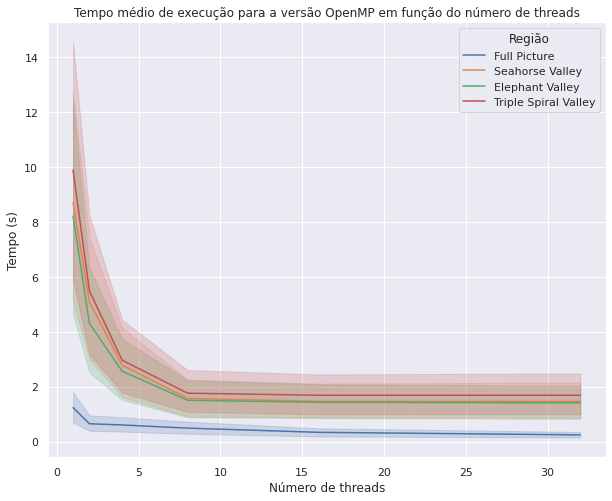

In [52]:
plot_stats(stats['omp'], 'threads', 'computation_time', 'Tempo médio de execução para a versão OpenMP em função do número de threads', 'Número de threads', 'Tempo (s)')

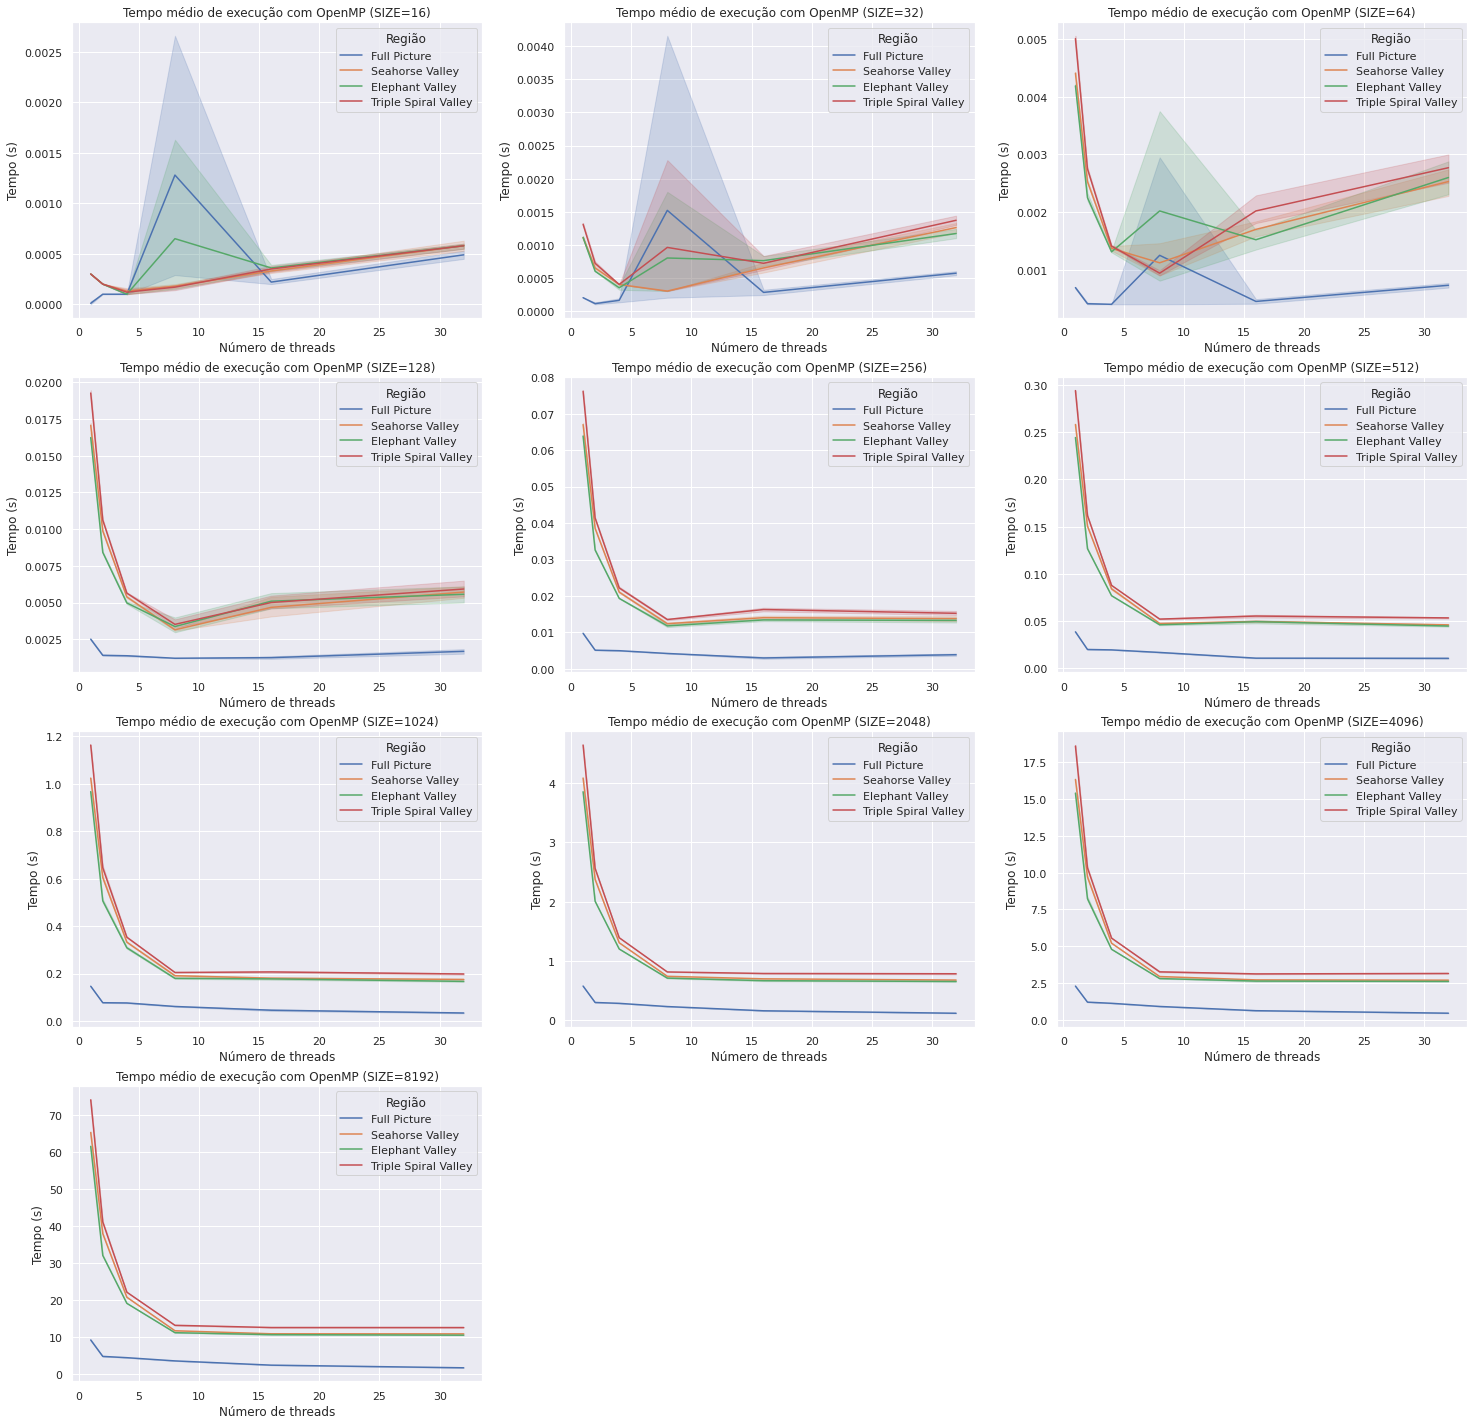

In [53]:
fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs[3, 1].axis('off')
axs[3, 2].axis('off')

for size in range(4, 14):
    df = stats['omp'][stats['omp']['size'] == 2**size]
    
    i, j = (size-4)//3, (size-4)%3
    
    sp1 = sns.lineplot(data=df, x='threads', y='computation_time', hue='region', ax=axs[i, j], palette='deep')
    axs[i,j].set_title(f'Tempo médio de execução com OpenMP (SIZE={2**size})')
    axs[i,j].set_xlabel('Número de threads')
    axs[i,j].set_ylabel('Tempo (s)')
    legend = axs[i,j].get_legend()
    handles = legend.legendHandles
    legend.remove()
    axs[i,j].legend(
        handles,
        ['Full Picture', 'Seahorse Valley', 'Elephant Valley', 'Triple Spiral Valley'],
        title='Região'
    )